In [43]:
# READ DATA IMPORTS

import h5py
import os
import time

# CODE HELPERS
import tensorflow as tf
import numpy as np

# DATA VISU
import matplotlib.pyplot as plt

basedir = '/mnt/dataC/HUGxGAN/data/'

config = tf.ConfigProto()
proto = config.gpu_options.allow_growth=True

# Data mining

Loading Data

Split into train/test

Visualization

In [44]:
def load_data(max_images=1000):
    
    with h5py.File(basedir + 'HUGxGAN_512.hdf5', 'r') as hdf:
        
        if max_images == 0: 
            X = hdf['X'][:]
            labels = hdf['y_modelName'][:]
            construct_name = hdf['y_manufacturer'][:]
        else:
            X = hdf['X'][:max_images]
            labels = hdf['y_modelName'][:max_images]
            construct_name = hdf['y_manufacturer'][:]
        
        X = np.expand_dims(X, axis=3)
        
    return X, labels, construct_name

X, labels, cstr_name = load_data(max_images=0)

In [47]:
set(labels)

{b'CXDI',
 b'DX-G',
 b'DigitalDiagnost',
 b'Essenta_DR_Compact',
 b'Fluorospot_Compact_FD',
 b'PCR_Eleva'}

In [46]:
set(cstr_name)

{b'Agfa', b'Canon_Inc.', b'Philips_Medical_Systems', b'SIEMENS'}

In [48]:
set(zip(labels,cstr_name))

{(b'CXDI', b'Canon_Inc.'),
 (b'DX-G', b'Agfa'),
 (b'DigitalDiagnost', b'Philips_Medical_Systems'),
 (b'Essenta_DR_Compact', b'Philips_Medical_Systems'),
 (b'Fluorospot_Compact_FD', b'SIEMENS'),
 (b'PCR_Eleva', b'Philips_Medical_Systems')}

In [6]:
def from_name_to_cat(y):
    y_names = set(y)
    y_int = np.zeros(len(y))

    for idx, value in enumerate(y_names):
        print(idx, value)
        y_int[np.where(y == value)] = int(idx)
        
    return y_int

y = from_name_to_cat(labels)

0 b'PCR_Eleva'
1 b'Essenta_DR_Compact'
2 b'Fluorospot_Compact_FD'
3 b'CXDI'
4 b'DX-G'
5 b'DigitalDiagnost'


In [24]:
len(y[np.where(y==5)])

7095

In [7]:
def split_data(prop_test = 0.10, prop_val = 0.10):

        lim_test = int(X.shape[0]*prop_test)
        lim_val = lim_test+ int(X.shape[0]*(prop_val))

        x_train = X[:-lim_val,:,:]
        x_val = X[-lim_val:-lim_test,:,:]
        x_test = X[-lim_test:,:,:]

        y_train = y[:-lim_val]
        y_val = y[-lim_val:-lim_test]
        y_test = y[-lim_test:]

        return x_train, x_val, x_test, y_train, y_val, y_test
    
x_train, x_val, x_test, y_train, y_val, y_test = split_data()

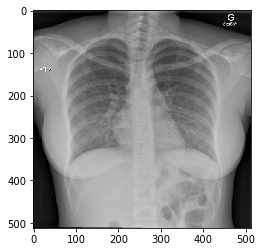

2.0


In [8]:
def show_image(x_data, idx=0):
    
    with tf.Graph().as_default():
        init = (tf.global_variables_initializer(), tf.local_variables_initializer())  

        with tf.Session(config=config) as sess:
            sess.run(init)
            img = sess.run(tf.image.grayscale_to_rgb(x_data[idx]*255)).astype(np.uint8)

        plt.imshow(img)
        plt.show()

idx = 100
show_image(x_train, idx=idx)
print(y_train[idx])

In [16]:
len(y[np.where(y==2)])

3264

from class labels to domain assignment

In [31]:
def split_into_class(X, y):
    
    X_a = X[np.where(y==5)]
    X_b = X[np.where(y==2)]
    
    return X_a, X_b

X_a, X_b = split_into_class(X, y)

In [35]:
len(X_a), len(X_b)

(7095, 3264)

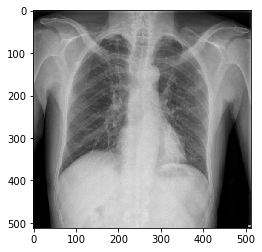

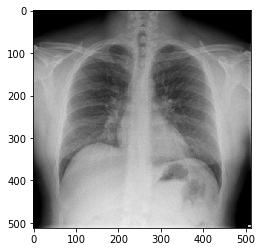

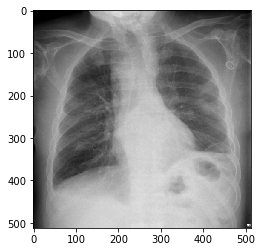

In [38]:
show_image(X_a,idx=1)
show_image(X_a,idx=3)
show_image(X_a,idx=4)

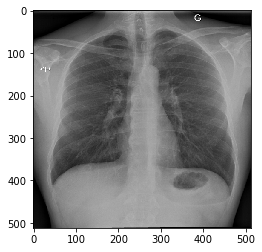

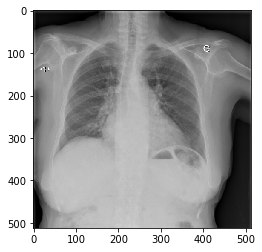

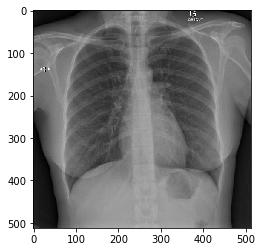

In [39]:
show_image(X_b,idx=2)
show_image(X_b,idx=3)
show_image(X_b,idx=4)

# Create data_processing() class

In [17]:
X_a = X[np.where(y != 0)]
X_b = X[np.where(y == 0)]
y_a = y[np.where(y != 0)]
y_b = y[np.where(y == 0)]

In [15]:
len(y_a), X_a.shape

(10870, (10870, 512, 512, 1))